## Combined all the data into a big df/csv

In [61]:
import pandas as pd
from datetime import datetime

In [62]:
df_price_000969_SZ = pd.read_csv("Datasets/Advanced Technology _ Materials Co., Ltd. (000969.SZ) Stock Prices.csv")
df_price_ASM_AX = pd.read_csv("Datasets/ASM.AX.csv")
df_price_000970_SZ = pd.read_csv("Datasets/Beijing Zhong Ke San Huan High-Tech Co., Ltd. (000970.SZ) Stock Prices.csv")
df_price_300127_SZ = pd.read_csv("Datasets/Chengdu Galaxy Magnets Co.,Ltd. (300127.SZ) Stock Prices.csv")
df_price_000795_SZ = pd.read_csv("Datasets/Innuovo Technology Co., Ltd. (000795.SZ) Stock Prices.csv")
df_interpolated_ev_sales = pd.read_csv("Datasets/Interpolated EV Sales.csv", parse_dates=['Date'], date_parser=lambda x: datetime.strptime(x, '%d/%m/%Y'))
df_interpolated_wind_energy = pd.read_csv("Datasets/Interpolated Wind Energy.csv")
df_price_LYC_AX = pd.read_csv("Datasets/LYC.AX.csv")
df_price_MP = pd.read_csv("Datasets/MP.csv")
df_price_NEO_TO = pd.read_csv("Datasets/NEO.TO.csv")
df_price_neodymium = pd.read_excel("Datasets/Neodymium Prices.xlsx")
df_price_600366_SS = pd.read_csv("Datasets/Ningbo Yunsheng Co., Ltd. (600366.SS) Stock Prices.csv")
df_price_600259_SS = pd.read_csv("Datasets/Rising Nonferrous Metals Share Co.,Ltd. (600259.SS) Stock Prices.csv")
df_price_002057_SZ = pd.read_csv("Datasets/Sinosteel New Materials Co., Ltd. (002057.SZ) Stock Prices.csv")
df_price_UUUU = pd.read_csv("Datasets/UUUU.csv")
df_price_300224_SZ = pd.read_csv("Datasets/Yantai Zhenghai Magnetic Material Co., Ltd. (300224.SZ) Stock Prices.csv")
df_price_002249_SZ = pd.read_csv("Datasets/Zhongshan Broad-Ocean Motor Co., Ltd. (002249.SZ) Stock Prices.csv")
df_price_USD_CNY = pd.read_csv("Datasets/USD_CNY.csv")


In [63]:
all_df_price_names = [df_price_000969_SZ, df_price_ASM_AX, df_price_000970_SZ, df_price_300127_SZ, df_price_000795_SZ, df_price_LYC_AX, df_price_MP, df_price_NEO_TO, df_price_600366_SS, df_price_600259_SS, df_price_002057_SZ, df_price_UUUU, df_price_300224_SZ, df_price_002249_SZ, df_price_USD_CNY]
all_price_names = ["000969_SZ", "ASM_AX", "000970_SZ", "300127_SZ", "000795_SZ", "LYC_AX", "MP", "NEO_TO", "600366_SS", "600259_SS", "002057_SZ", "UUUU", "300224_SZ", "002249_SZ", "USD_CNY"]
all_df_other_names = [df_interpolated_ev_sales, df_interpolated_wind_energy]
all_other_names = ["ev_sales", "wind_energy"]

In [64]:

for name in all_df_price_names: 
    name["Date"] = pd.to_datetime(name["Date"])
for name in all_df_other_names:
    name["Date"] = pd.to_datetime(name["Date"])

df_price_neodymium["Date"] = pd.to_datetime(df_price_neodymium["Date"])

C:\Users\brian\AppData\Local\Temp\ipykernel_10288\2172093778.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  name["Date"] = pd.to_datetime(name["Date"])
C:\Users\brian\AppData\Local\Temp\ipykernel_10288\2172093778.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  name["Date"] = pd.to_datetime(name["Date"])
C:\Users\brian\AppData\Local\Temp\ipykernel_10288\2172093778.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  name["Date"] = pd.to_datetime(name["Date"])


In [65]:
df = pd.DataFrame()
for i in range(len(all_df_price_names)): 
    relevant_df = all_df_price_names[i][["Date", "Adj Close", "Volume"]]
    relevant_df = relevant_df.rename(columns = {"Adj Close" : f"Adj Close {all_price_names[i]}", "Volume" : f"Volume {all_price_names[i]}"})
    # print(relevant_df)
    relevant_df = relevant_df.set_index("Date")
    df = df.join(relevant_df, how = "outer")

for i in range(len(all_df_other_names)):
    try :
        relevant_df = all_df_other_names[i][["Date", "Interpolated Demand", "Interpolated Value"]]
        relevant_df = relevant_df.rename(columns = {"Interpolated Demand": f"Interpolated Demand {all_other_names[i]}", "Interpolated Value" : f"Interpolated Value {all_other_names[i]}"})
        relevant_df = relevant_df.set_index("Date")
        df = df.join(relevant_df, how = "outer")
    except:
        relevant_df = all_df_other_names[i][["Date", "Interpolated Value"]]
        relevant_df = relevant_df.rename(columns = {"Interpolated Value" : f"Interpolated Value {all_other_names[i]}"})
        relevant_df = relevant_df.set_index("Date")
        df = df.join(relevant_df, how = "outer")

In [66]:
df =df.drop(columns=["Volume USD_CNY"])

In [67]:
df_price_neodymium = df_price_neodymium.set_index("Date")
df = df.join(df_price_neodymium, how = "left")

In [68]:
df["Price (CNY/T)"] = df["Price (CNY/T)"].shift(periods = 30) ## Adding response variable to the df, shift 30 days look ahead period 

## Extract data from jan 2021 to oct 2022 and preprocess it further 

In [69]:
df = df[df.index > "2021-01-01"] # Look at data after 4 jan 2020 
df = df[df.index < "2022-12-31"]
df = df.fillna(method = "ffill")
df = df.tail(-2)

In [70]:
df

,Adj Close 000969_SZ,Volume 000969_SZ,Adj Close ASM_AX,Volume ASM_AX,Adj Close 000970_SZ,Volume 000970_SZ,Adj Close 300127_SZ,Volume 300127_SZ,Adj Close 000795_SZ,Volume 000795_SZ,Adj Close LYC_AX,Volume LYC_AX,Adj Close MP,Volume MP,Adj Close NEO_TO,Volume NEO_TO,Adj Close 600366_SS,Volume 600366_SS,Adj Close 600259_SS,Volume 600259_SS,Adj Close 002057_SZ,Volume 002057_SZ,Adj Close UUUU,Volume UUUU,Adj Close 300224_SZ,Volume 300224_SZ,Adj Close 002249_SZ,Volume 002249_SZ,Adj Close USD_CNY,Interpolated Demand ev_sales,Interpolated Value ev_sales,Interpolated Value wind_energy,Price (CNY/T)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-04,6.713665,14145487.0,4.780000,439213.0,9.721244,25615730.0,16.844931,5962203.0,5.59,17232127.0,4.18,7178597.0,29.139999,5964500.0,19.647623,112200.0,6.437795,29550728.0,31.219999,7075035.0,7.071275,10698535.0,3.94,6334200.0,12.287955,20536658.0,4.373618,96506968.0,6.5512,23570.37653,9.944049e+08,2812.868336,635000.0
2021-01-05,6.753568,13718457.0,4.780000,439213.0,9.750911,16332830.0,17.007177,6788244.0,5.57,12893976.0,4.35,10512932.0,29.309999,3178200.0,19.647623,112200.0,6.389024,26567860.0,31.180000,5486366.0,7.003282,9020575.0,4.37,6103100.0,13.202180,41497311.0,4.316941,78225479.0,6.5512,23486.75732,9.910441e+08,2809.391347,635000.0
2021-01-06,6.613908,11556685.0,5.020000,544232.0,9.701465,13923363.0,16.510895,5067661.0,5.43,14612100.0,4.28,7685366.0,29.490000,4130500.0,16.458689,32800.0,6.184185,26114889.0,31.160000,4896242.0,6.906149,9138725.0,4.16,5397400.0,12.808965,21643522.0,4.175247,60969682.0,6.3690,23403.13810,9.876834e+08,2805.914358,635000.0
2021-01-07,6.514151,13426712.0,7.290000,599618.0,9.661907,18112475.0,16.215036,5105801.0,5.36,15409792.0,4.59,10056522.0,29.750000,4144900.0,16.458689,32800.0,6.028117,26370795.0,31.580000,8108812.0,6.711883,11127421.0,4.20,3149100.0,12.533715,20727502.0,4.118569,57241206.0,6.4562,23319.51888,9.843226e+08,2802.437369,625000.0
2021-01-08,6.753568,20120275.0,7.290000,599618.0,9.711353,18551280.0,15.785563,5342705.0,5.23,18467772.0,4.60,10106663.0,29.490000,3819300.0,16.458689,32800.0,5.901312,25057368.0,31.150000,6756327.0,6.605037,8297369.0,4.01,4795200.0,11.747286,21529118.0,4.203585,68194148.0,6.4562,23235.89966,9.809619e+08,2798.960380,625000.0
2021-01-09,6.753568,20120275.0,10.970000,503608.0,9.711353,18551280.0,15.785563,5342705.0,5.23,18467772.0,4.60,10106663.0,29.490000,3819300.0,18.173031,107300.0,5.901312,25057368.0,31.150000,6756327.0,6.605037,8297369.0,4.01,4795200.0,11.747286,21529118.0,4.203585,68194148.0,6.4596,23152.28044,9.776012e+08,2795.483391,615000.0
2021-01-10,6.753568,20120275.0,9.990000,322541.0,9.711353,18551280.0,15.785563,5342705.0,5.23,18467772.0,4.60,10106663.0,29.490000,3819300.0,17.583664,88000.0,5.901312,25057368.0,31.150000,6756327.0,6.605037,8297369.0,4.01,4795200.0,11.747286,21529118.0,4.203585,68194148.0,6.4455,23068.66122,9.742404e+08,2792.006402,610000.0
2021-01-11,6.863301,22474564.0,10.960000,484554.0,9.820137,35900319.0,15.947805,5330195.0,5.23,19406651.0,4.51,10369084.0,29.500000,4217200.0,18.469591,83100.0,5.715982,29218670.0,31.709999,11565844.0,6.575897,7764627.0,3.96,3445600.0,12.307617,25610518.0,3.901305,73128902.0,6.4047,22985.04200,9.708797e+08,2788.529412,610000.0
2021-01-12,6.903204,17654391.0,12.550000,441352.0,9.899252,26282650.0,15.690123,4300493.0,5.24,14588575.0,4.38,7929830.0,34.680000,7311700.0,19.971806,92000.0,5.735490,18111324.0,31.299999,7424439.0,6.614750,5890975.0,3.76,4108400.0,12.622189,16869880.0,3.910751,45456629.0,6.3632,22901.42278,9.675189e+08,2785.052423,610000.0


In [71]:
df.isnull().values.any()

False

In [72]:
df.to_csv("combined_raw_variables.csv")

In [73]:
df.corr(numeric_only=True)

,Adj Close 000969_SZ,Volume 000969_SZ,Adj Close ASM_AX,Volume ASM_AX,Adj Close 000970_SZ,Volume 000970_SZ,Adj Close 300127_SZ,Volume 300127_SZ,Adj Close 000795_SZ,Volume 000795_SZ,Adj Close LYC_AX,Volume LYC_AX,Adj Close MP,Volume MP,Adj Close NEO_TO,Volume NEO_TO,Adj Close 600366_SS,Volume 600366_SS,Adj Close 600259_SS,Volume 600259_SS,Adj Close 002057_SZ,Volume 002057_SZ,Adj Close UUUU,Volume UUUU,Adj Close 300224_SZ,Volume 300224_SZ,Adj Close 002249_SZ,Volume 002249_SZ,Adj Close USD_CNY,Interpolated Demand ev_sales,Interpolated Value ev_sales,Interpolated Value wind_energy,Price (CNY/T)
Adj Close 000969_SZ,1.000000,0.584985,0.299943,0.159185,0.524812,0.412165,0.845297,0.525671,0.556578,0.533202,0.410659,-0.147086,0.175657,-0.307522,0.180878,-0.079757,0.756824,0.503527,0.754697,0.204625,0.385993,0.451357,0.201504,-0.173225,0.685769,0.512369,0.891496,0.394839,-0.068362,0.221971,0.178363,0.004102,0.087096
Volume 000969_SZ,0.584985,1.000000,0.271393,0.089145,0.053123,0.271660,0.454712,0.622784,0.106349,0.316803,-0.104210,-0.037102,0.018950,-0.063019,0.284505,-0.100922,0.154283,0.489727,0.277436,0.347285,-0.013573,0.219353,-0.067605,-0.113153,0.336122,0.505258,0.336819,0.434033,-0.162707,-0.062139,-0.059890,-0.245325,-0.299703
Adj Close ASM_AX,0.299943,0.271393,1.000000,-0.002168,-0.225328,0.049991,0.474047,0.386563,-0.112404,0.190282,-0.083952,0.079993,0.294331,-0.002021,0.774625,-0.095381,0.050734,0.385585,0.250601,0.294071,-0.360137,0.206092,0.168106,0.121493,0.097075,0.273275,0.391692,0.431387,-0.759642,-0.375394,-0.390170,0.115762,-0.190172
Volume ASM_AX,0.159185,0.089145,-0.002168,1.000000,0.111818,0.066441,0.105753,0.133315,0.092096,0.075459,0.067554,0.069909,-0.056590,-0.020114,-0.136201,0.139028,0.194037,0.118469,0.187290,0.103582,0.159508,0.180832,-0.043084,0.015981,0.089658,0.057336,0.146223,0.083340,0.190968,0.162228,0.154110,-0.047195,-0.001795
Adj Close 000970_SZ,0.524812,0.053123,-0.225328,0.111818,1.000000,0.487075,0.362288,0.060369,0.773927,0.374718,0.618522,-0.189384,0.018413,-0.270103,-0.361531,0.045720,0.828087,0.068686,0.562726,-0.148622,0.926131,0.343949,0.147263,-0.264895,0.697393,0.282133,0.467499,-0.147528,0.365739,0.544062,0.489972,0.036052,0.486904
Volume 000970_SZ,0.412165,0.271660,0.049991,0.066441,0.487075,1.000000,0.353236,0.443396,0.295020,0.302421,0.155274,-0.029228,0.040010,-0.037342,-0.015500,-0.054592,0.390814,0.493286,0.487858,0.412987,0.326494,0.409508,-0.114126,-0.039938,0.459134,0.438454,0.319495,0.212657,0.006378,0.052993,0.022253,-0.116116,0.028614
Adj Close 300127_SZ,0.845297,0.454712,0.474047,0.105753,0.362288,0.353236,1.000000,0.654341,0.570928,0.656582,0.429105,-0.021181,0.445526,-0.183774,0.360977,-0.107810,0.699133,0.563353,0.697520,0.194190,0.141116,0.463632,0.320825,-0.038172,0.777230,0.677845,0.876397,0.401357,-0.286957,0.024665,-0.019980,0.324835,0.164458
Volume 300127_SZ,0.525671,0.622784,0.386563,0.133315,0.060369,0.443396,0.654341,1.000000,0.153152,0.464967,-0.045532,0.012672,0.185644,-0.044451,0.367153,-0.098581,0.248484,0.727653,0.380234,0.549115,-0.069258,0.383297,-0.077618,-0.058159,0.489457,0.767301,0.406206,0.509028,-0.269515,-0.156399,-0.168393,-0.127088,-0.244791
Adj Close 000795_SZ,0.556578,0.106349,-0.112404,0.092096,0.773927,0.295020,0.570928,0.153152,1.000000,0.704672,0.783369,-0.136359,0.339554,-0.251265,-0.257383,-0.005254,0.819150,0.106053,0.506052,-0.226196,0.690164,0.279644,0.296568,-0.193017,0.855825,0.492707,0.547381,-0.154362,0.219954,0.522618,0.479940,0.357717,0.643820
Volume 000795_SZ,0.533202,0.316803,0.190282,0.075459,0.374718,0.302421,0.656582,0.464967,0.704672,1.000000,0.387667,0.013455,0.355378,-0.110252,0.136730,-0.113444,0.523990,0.428957,0.467013,0.167980,0.232091,0.347036,0.123826,-0.078472,0.747507,0.708730,0.509107,0.178141,-0.148082,0.074339,0.042158,0.241864,0.265366


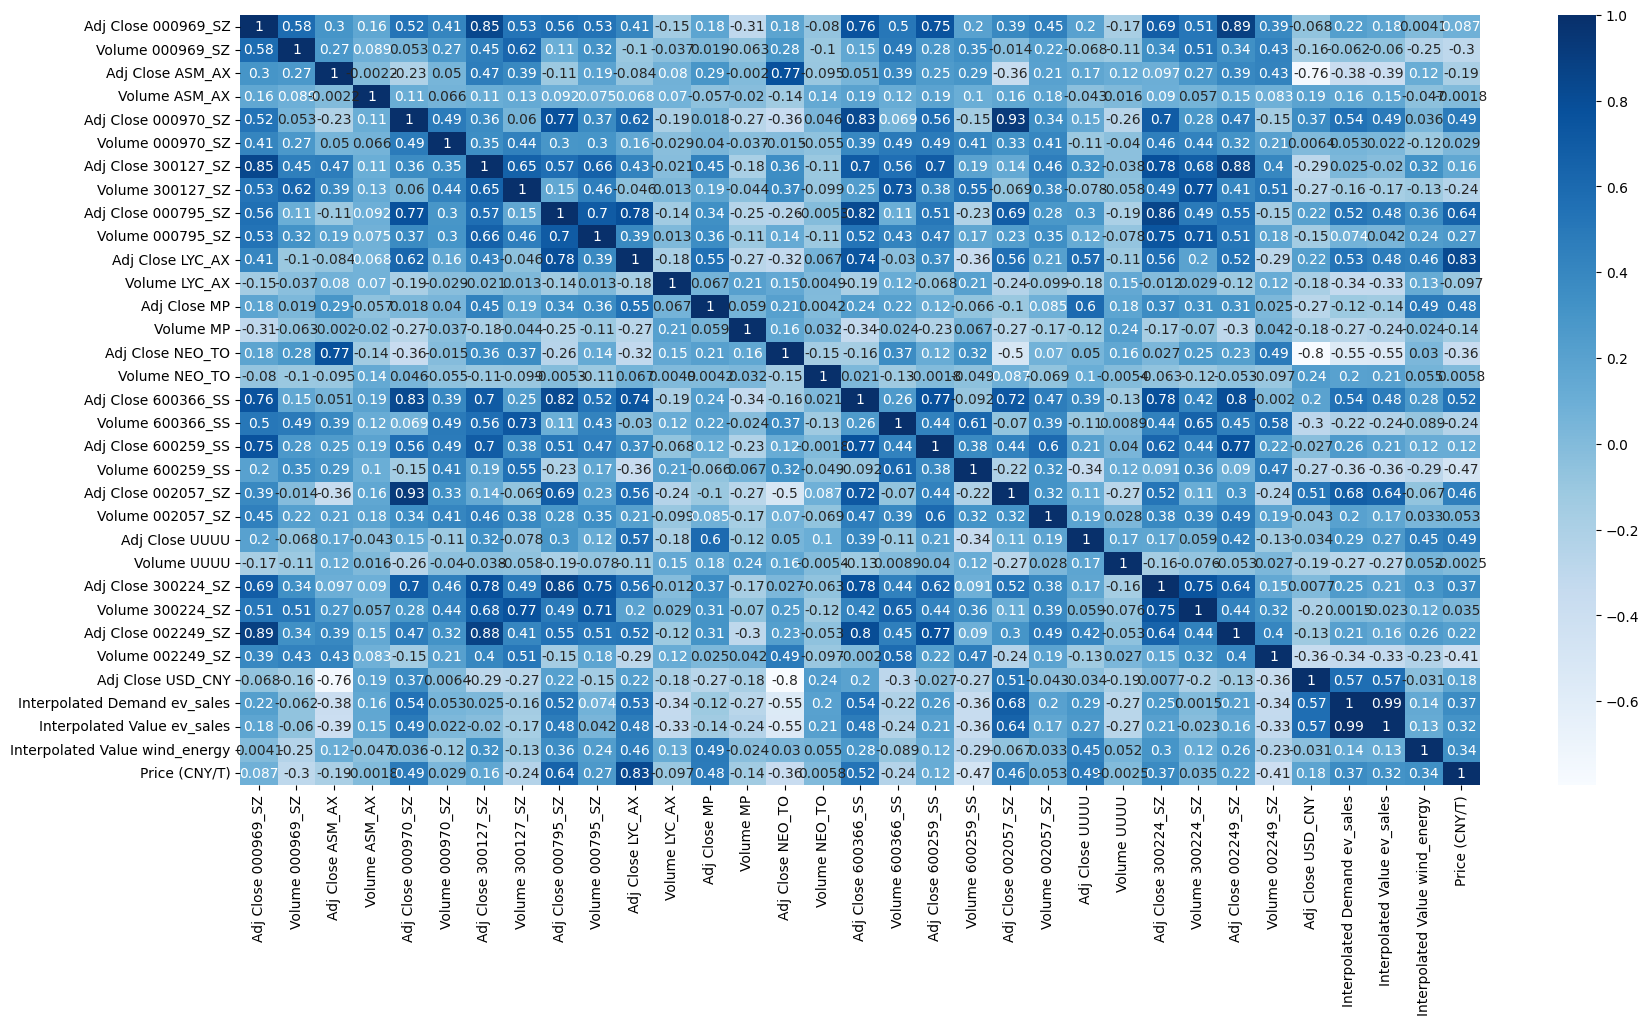

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
ax =  sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

In [75]:
df.corr(method="spearman")

,Adj Close 000969_SZ,Volume 000969_SZ,Adj Close ASM_AX,Volume ASM_AX,Adj Close 000970_SZ,Volume 000970_SZ,Adj Close 300127_SZ,Volume 300127_SZ,Adj Close 000795_SZ,Volume 000795_SZ,Adj Close LYC_AX,Volume LYC_AX,Adj Close MP,Volume MP,Adj Close NEO_TO,Volume NEO_TO,Adj Close 600366_SS,Volume 600366_SS,Adj Close 600259_SS,Volume 600259_SS,Adj Close 002057_SZ,Volume 002057_SZ,Adj Close UUUU,Volume UUUU,Adj Close 300224_SZ,Volume 300224_SZ,Adj Close 002249_SZ,Volume 002249_SZ,Adj Close USD_CNY,Interpolated Demand ev_sales,Interpolated Value ev_sales,Interpolated Value wind_energy,Price (CNY/T)
Adj Close 000969_SZ,1.000000,0.564037,0.247756,0.117016,0.597771,0.544448,0.851884,0.480231,0.513496,0.532251,0.401844,-0.068870,0.213694,-0.373399,0.156351,-0.058697,0.785868,0.489420,0.799874,0.192494,0.473614,0.581258,0.214308,-0.241072,0.662351,0.462153,0.890060,0.306180,-0.102545,0.270870,0.210895,0.008338,0.143586
Volume 000969_SZ,0.564037,1.000000,0.253029,-0.027047,0.017251,0.385581,0.370423,0.590671,-0.037057,0.259401,-0.192707,0.003246,0.010253,-0.041219,0.354816,-0.146380,0.175981,0.522716,0.310395,0.452547,-0.049122,0.281303,-0.129492,-0.122553,0.196502,0.387640,0.304590,0.632741,-0.094387,-0.190689,-0.184487,-0.365694,-0.361846
Adj Close ASM_AX,0.247756,0.253029,1.000000,0.005881,-0.233949,0.032458,0.408726,0.423857,-0.182868,0.185445,-0.080386,0.138480,0.353904,0.061689,0.752171,-0.125946,0.033303,0.425769,0.183840,0.323386,-0.337091,0.164244,0.124610,0.188184,-0.001696,0.233139,0.313089,0.449175,-0.788099,-0.372997,-0.395017,0.106309,-0.245593
Volume ASM_AX,0.117016,-0.027047,0.005881,1.000000,0.193424,0.213464,0.136245,0.118826,0.137847,0.146962,0.117526,0.116677,0.001141,-0.023636,-0.202916,0.149600,0.190076,0.095064,0.150875,0.046914,0.216165,0.145315,0.020516,0.047365,0.151616,0.113118,0.133469,-0.091268,0.179639,0.188517,0.164429,0.013707,0.042453
Adj Close 000970_SZ,0.597771,0.017251,-0.233949,0.193424,1.000000,0.570790,0.492048,0.047474,0.874989,0.498223,0.681541,-0.125762,0.078330,-0.382484,-0.369250,0.140654,0.872350,0.082009,0.637581,-0.201703,0.928017,0.522862,0.273627,-0.333598,0.781287,0.324899,0.596026,-0.274281,0.239850,0.717000,0.667635,0.235774,0.574199
Volume 000970_SZ,0.544448,0.385581,0.032458,0.213464,0.570790,1.000000,0.518908,0.551149,0.433132,0.623922,0.237609,0.021006,0.137852,-0.200132,-0.085519,0.033873,0.548055,0.579252,0.581341,0.386725,0.494136,0.660027,-0.073439,-0.186513,0.615415,0.634374,0.441737,0.190546,0.116535,0.225940,0.188445,-0.051984,0.057108
Adj Close 300127_SZ,0.851884,0.370423,0.408726,0.136245,0.492048,0.518908,1.000000,0.604632,0.521383,0.669655,0.480416,0.076573,0.496995,-0.213592,0.264272,-0.091749,0.746739,0.618719,0.768808,0.197531,0.323517,0.598332,0.311743,-0.024402,0.715465,0.590938,0.885655,0.303876,-0.307285,0.131783,0.070509,0.266855,0.228331
Volume 300127_SZ,0.480231,0.590671,0.423857,0.118826,0.047474,0.551149,0.604632,1.000000,0.130952,0.675487,-0.034642,0.155978,0.350172,0.068771,0.385758,-0.156825,0.268730,0.839355,0.427925,0.615645,-0.060291,0.457490,-0.148251,0.073724,0.416446,0.790380,0.371889,0.589271,-0.274727,-0.225065,-0.230568,-0.137323,-0.216258
Adj Close 000795_SZ,0.513496,-0.037057,-0.182868,0.137847,0.874989,0.433132,0.521383,0.130952,1.000000,0.679458,0.827256,-0.049195,0.315320,-0.261621,-0.339300,0.069529,0.829811,0.147596,0.541288,-0.256932,0.826183,0.451951,0.322059,-0.231377,0.849589,0.444308,0.544631,-0.279544,0.122151,0.654697,0.624166,0.361244,0.743925
Volume 000795_SZ,0.532251,0.259401,0.185445,0.146962,0.498223,0.623922,0.669655,0.675487,0.679458,1.000000,0.537494,0.143219,0.484636,-0.093853,0.008616,-0.056918,0.624426,0.664343,0.549253,0.251504,0.397596,0.558357,0.067886,-0.042405,0.764985,0.825285,0.535553,0.164927,-0.126276,0.174735,0.139462,0.198976,0.370300


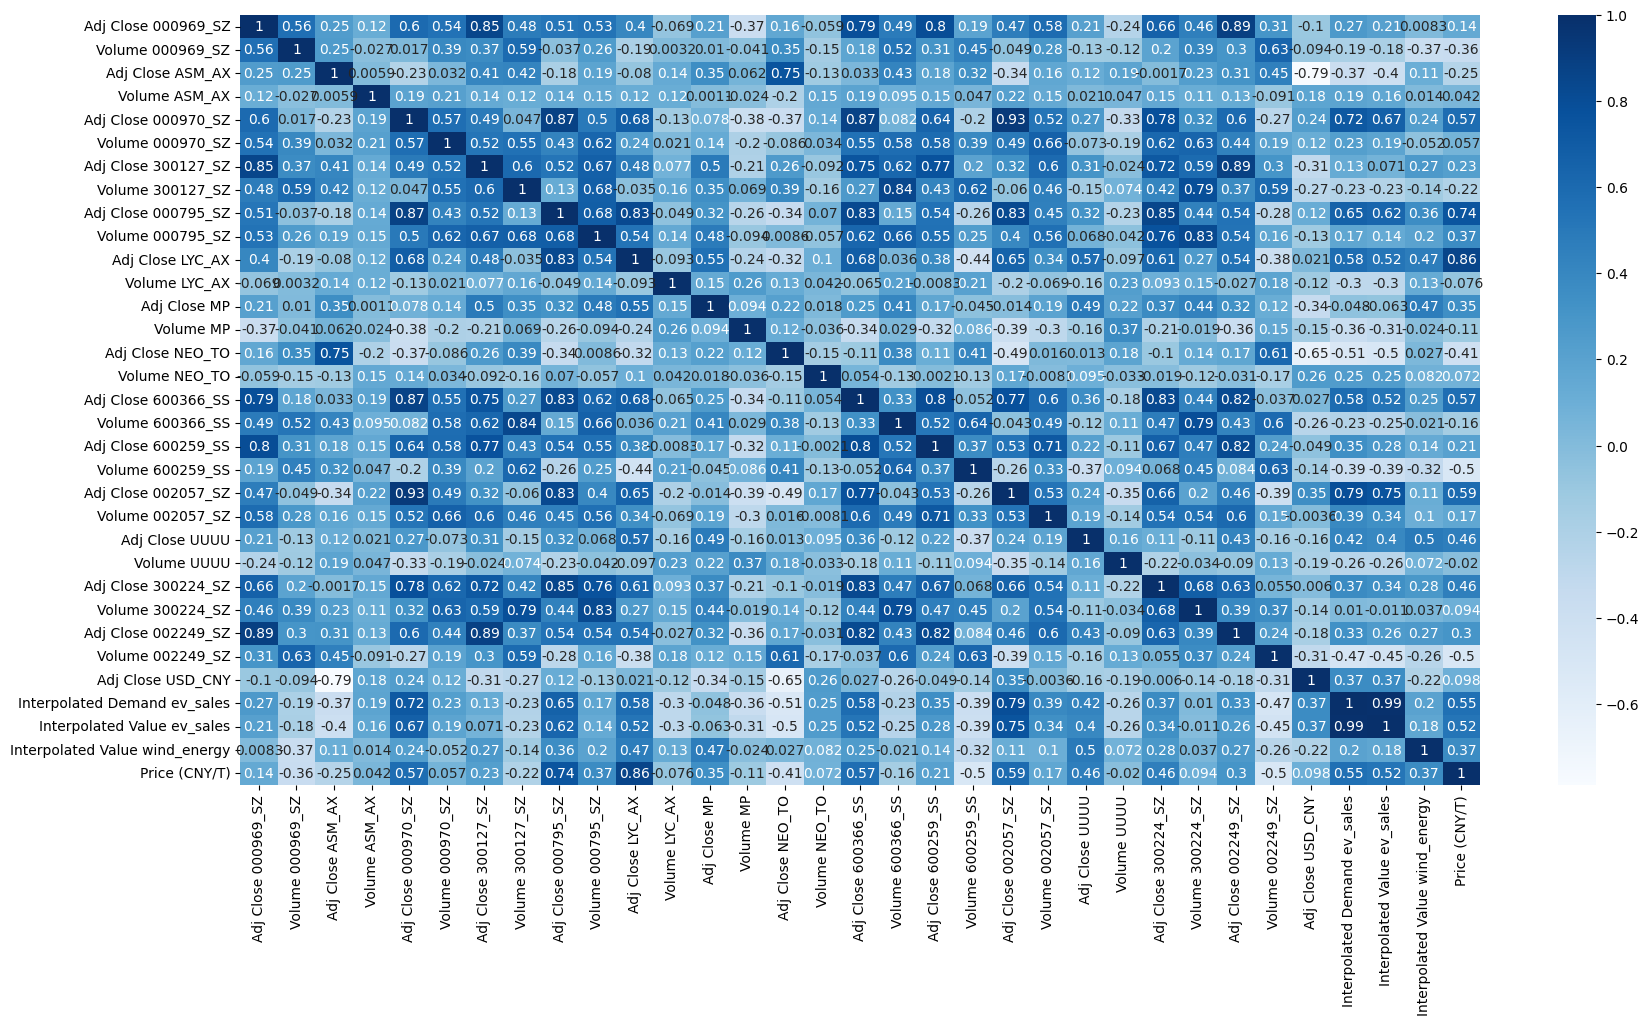

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
ax =  sns.heatmap(df.corr(numeric_only=True, method="spearman"), annot=True, cmap='Blues')

In [77]:
price_corr = df.corr(method="spearman")["Price (CNY/T)"]
price_corr[price_corr > 0.5]

Adj Close 000970_SZ             0.574199
Adj Close 000795_SZ             0.743925
Adj Close LYC_AX                0.858415
Adj Close 600366_SS             0.570088
Adj Close 002057_SZ             0.590438
Interpolated Demand ev_sales    0.554029
Interpolated Value ev_sales     0.522251
Price (CNY/T)                   1.000000
Name: Price (CNY/T), dtype: float64

In [78]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [79]:
df_columns_list = df.columns.tolist()
predicted = df_columns_list[-1]
variables = df_columns_list[0:-1]
variables_string = ""
for var in variables:
    variables_string = variables_string + (var + ",")
# variables_string = variables_string[0:-1] ## Remove the last comma
variables_string = variables_string[0:19] 
linear_regression_formula = f"{variables_string} ~ {predicted}"
variables_string

'Adj Close 000969_SZ'

In [80]:
model = sm.OLS(df["Price (CNY/T)"], df.loc[:, df.columns != "Price (CNY/T)"]).fit()

In [81]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:          Price (CNY/T)   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              2671.
Date:                Sat, 18 Feb 2023   Prob (F-statistic):                        0.00
Time:                        22:56:18   Log-Likelihood:                         -9198.0
No. Observations:                 720   AIC:                                  1.846e+04
Df Residuals:                     688   BIC:                                  1.861e+04
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [82]:
import tensorflow as tf
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import math
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense

In [83]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

In [84]:
regressors = ["Adj Close 000970_SZ", "Adj Close 000795_SZ", "Adj Close LYC_AX", "Adj Close 600366_SS", "Adj Close 002057_SZ", "Interpolated Demand ev_sales", "Interpolated Value ev_sales"]
x = df[regressors]
x = sc.fit_transform(x.to_numpy())
x = pd.DataFrame(x, columns=regressors)
y = df["Price (CNY/T)"]
y = sc.fit_transform(np.array(y).reshape(len(df), 1))

In [85]:
x_train = np.array(x[:500])
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.array(x[500:])
y_train = np.array(y[:500]).reshape(500,1)
y_test = np.array(y[500:]).reshape(len(y)-500,1)

In [86]:
batch_size = 256
buffer_size = x_train.shape[0]
train_iterator = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(buffer_size).batch(batch_size).repeat()

In [87]:
x_train.shape

(500, 7, 1)

In [88]:
n_steps = x_train.shape[-2]
n_features = x_train.shape[-1]
# Define the model
model = Sequential()
model.add(Bidirectional(LSTM(64, activation='relu', input_shape=(n_steps, n_features))))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [89]:
epochs = 10
steps_per_epoch = 50
history = model.fit(train_iterator, epochs=epochs,
                    steps_per_epoch=steps_per_epoch)
print('=======================')
model.summary()

Epoch 1/10
50/50 [==============================] - 3s 11ms/step - loss: 0.0642
Epoch 2/10
50/50 [==============================] - 0s 10ms/step - loss: 0.0456
Epoch 3/10
50/50 [==============================] - 0s 10ms/step - loss: 0.0447
Epoch 4/10
50/50 [==============================] - 0s 10ms/step - loss: 0.0439
Epoch 5/10
50/50 [==============================] - 0s 9ms/step - loss: 0.0419
Epoch 6/10
50/50 [==============================] - 0s 9ms/step - loss: 0.0357
Epoch 7/10
50/50 [==============================] - 0s 10ms/step - loss: 0.0220
Epoch 8/10
50/50 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 9/10
50/50 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 10/10
50/50 [==============================] - 0s 9ms/step - loss: 0.0067
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 128)         

In [90]:
predicted_price = model.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price)

7/7 [==============================] - 0s 3ms/step
[[1389208.4 ]
 [1400971.2 ]
 [1402446.  ]
 [1403933.4 ]
 [1381738.  ]
 [1429869.2 ]
 [1368051.2 ]
 [1382769.4 ]
 [1380425.6 ]
 [1382951.4 ]
 [1385500.4 ]
 [1465218.  ]
 [1456928.9 ]
 [1314971.8 ]
 [1292739.6 ]
 [1357755.8 ]
 [1356637.6 ]
 [1355525.4 ]
 [1262141.6 ]
 [1305737.2 ]
 [1324670.2 ]
 [1234147.5 ]
 [1096881.6 ]
 [1096199.2 ]
 [1095520.6 ]
 [1069816.  ]
 [1060656.1 ]
 [1153344.5 ]
 [1151305.6 ]
 [1051209.8 ]
 [1050636.6 ]
 [1050067.2 ]
 [ 998138.44]
 [1090628.8 ]
 [1052746.6 ]
 [ 945359.8 ]
 [ 886823.56]
 [ 886093.2 ]
 [ 885348.5 ]
 [ 894756.06]
 [ 834883.25]
 [ 794211.8 ]
 [ 765714.56]
 [ 804113.3 ]
 [ 804149.06]
 [ 804184.75]
 [ 792955.94]
 [ 774786.  ]
 [ 759175.6 ]
 [ 751881.2 ]
 [ 780601.56]
 [ 780633.5 ]
 [ 780665.44]
 [ 735019.94]
 [ 681814.25]
 [ 698446.  ]
 [ 750914.6 ]
 [ 737086.4 ]
 [ 737110.9 ]
 [ 737135.44]
 [ 738280.94]
 [ 706434.  ]
 [ 665341.4 ]
 [ 686338.3 ]
 [ 683384.8 ]
 [ 683400.56]
 [ 683416.25]
 [ 698589.9

In [91]:
sc.inverse_transform(y_test)

array([[1105000.],
       [1110000.],
       [1095000.],
       [1095000.],
       [1095000.],
       [1095000.],
       [1095000.],
       [1095000.],
       [1095000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1135000.],
       [1150000.],
       [1150000.],
       [1150000.],
       [1150000.],
       [1150000.],
       [1160000.],
       [1170000.],
       [1170000.],
       [1170000.],
       [1170000.],
       [1170000.],
       [1170000.],
       [1170000.],
       [1170000.],
       [1170000.],
       [1185000.],
       [1185000.],
       [1185000.],
       [1185000.],
       [1195000.],
       [1195000.],
       [1195000.],
       [1195000.],
       [1195000.],
       [1195000.],
       [1195000.],
       [1195000.],
       [1200000.],
       [1200000.],
       [1200000.],
       [1200